#A3: Entrenamiento de Red Neuronal Artificial Simple
INTELIGENCIA ARTIFICIAL Y REDES NEURONALES

Nombre: Máximo Iesus De la Cruz Ledezma

Matrícula: 1949552

Hora: N1

En la siguiente actividad se implementará una red neuronal para un conjunto de datos MNIST, para lo cual se utilizará un conjunto de datos de 70000 imágenes, de las cuales se destinarán 60000 imágenes de entrenamiento y 10000 imágenes de prueba. 

El objetivo final es que la red neuronal pueda distinguir del conjunto de datos el número que está indicado en las imágenes.

In [2]:
#Llamamos a las librerías de ayuda.
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
#En esta celda importamos el set de datos de mnist.
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#En esta celda le damos nombre a cada una de las clases que hay en nuestro set de datos, que son los números del 0 al 9.
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [5]:
#Nos muestra el número de datos del set de entrenamiento, representando que cada imagen es de 28 x 28 pixeles.
train_images.shape

(60000, 28, 28)

In [6]:
#Hay 60000 etiquetas que conforman el set de entrenamiento.
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
#Nos muestra el número de datos del set de pruebas, representando que cada imagen es de 28 x 28 pixeles.
test_images.shape

(10000, 28, 28)

In [9]:
#Hay 10000 etiquetas que conforman el set de pruebas.
len(test_labels)

10000

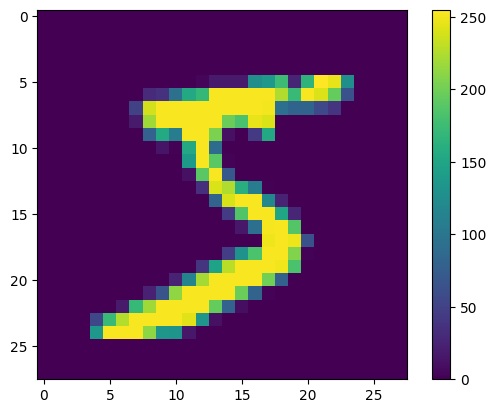

In [13]:
#Se explora la primera imagen correspondiente al set de entrenamiento para así observar que los valores de los pixeles están entre 0 y 255.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#Escalamos los valores en un rango de 0 a 1 normalizando, o sea dividiendo entre 255.
train_images = train_images / 255.0

test_images = test_images / 255.0

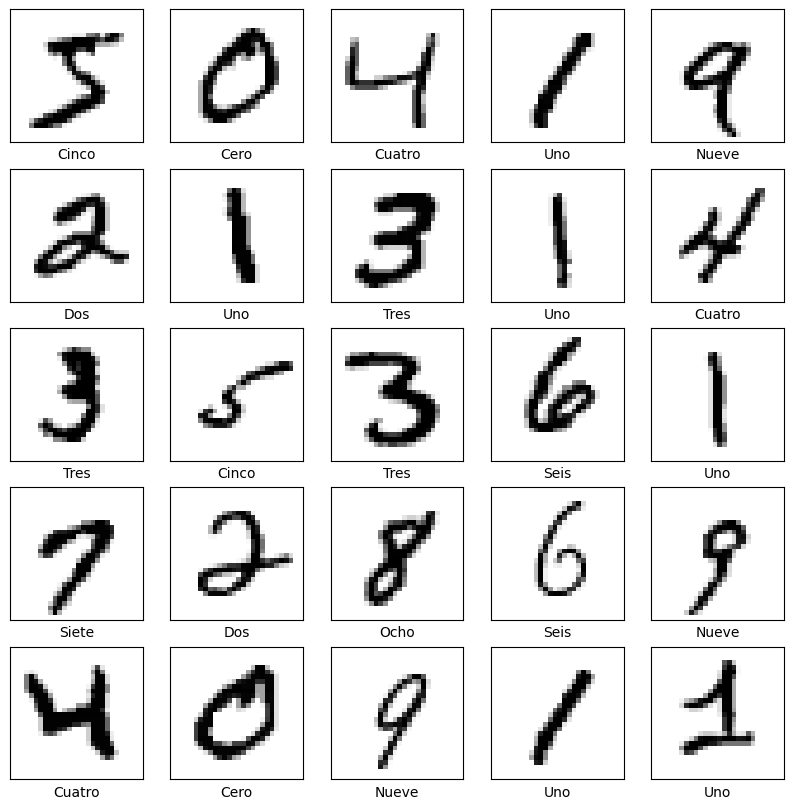

In [15]:
#Desplegamos las primeras 25 imágenes del set de entrenamiento para así verificar que el set esté en el formato adecuado.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#Configuramos las capas que tendrá nuestra red neuronal.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
#Compilamos el modelo para verificar qué tan exacto es así como también monitorear los pasos de entrenamiento y de pruebas.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#Comenzamos a entrenar la red Neuronal con el comando model.fit, el cual ajusta el modelo al set de entrenamiento.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2575 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1154 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0799 - accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0596 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0459 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0196 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

In [22]:
#Evaluar la Exacitud del modelo.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0750 - accuracy: 0.9789 - 708ms/epoch - 2ms/step

Test accuracy: 0.9789000153541565


In [23]:
#Usamos este comando para realizar algunas predicciones sobre las imagenes.
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [24]:
predictions[0]

array([3.5784180e-07, 3.9321364e-09, 8.8159972e-08, 1.1102278e-03,
       1.1349076e-12, 2.3733046e-08, 6.0182961e-16, 9.9751693e-01,
       8.3509583e-08, 1.3722995e-03], dtype=float32)

In [25]:
np.argmax(predictions[0])

7

In [26]:
test_labels[0]

7

In [27]:
#Graficamos para obtener lo que sería una predicción correspondiente a las 10 diferentes clases de nuestro set de datos.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

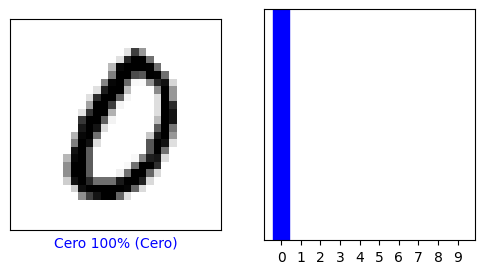

In [49]:
#Observamos la imagen 851, las etiquetas de predicción correctas están en azul y las incorrectas en rojo, nos damos cuenta que
#hay un 100% de una predicción correcta.
i = 851
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

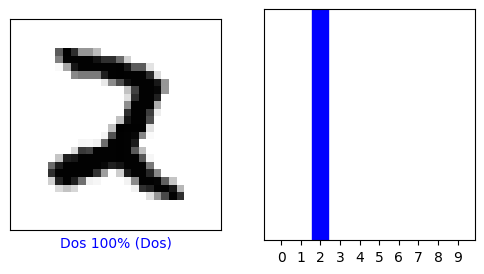

In [32]:
#Ahora vemos la imagen 9569 y también podemos observar el 100% de predicción correcta.
i = 9569
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

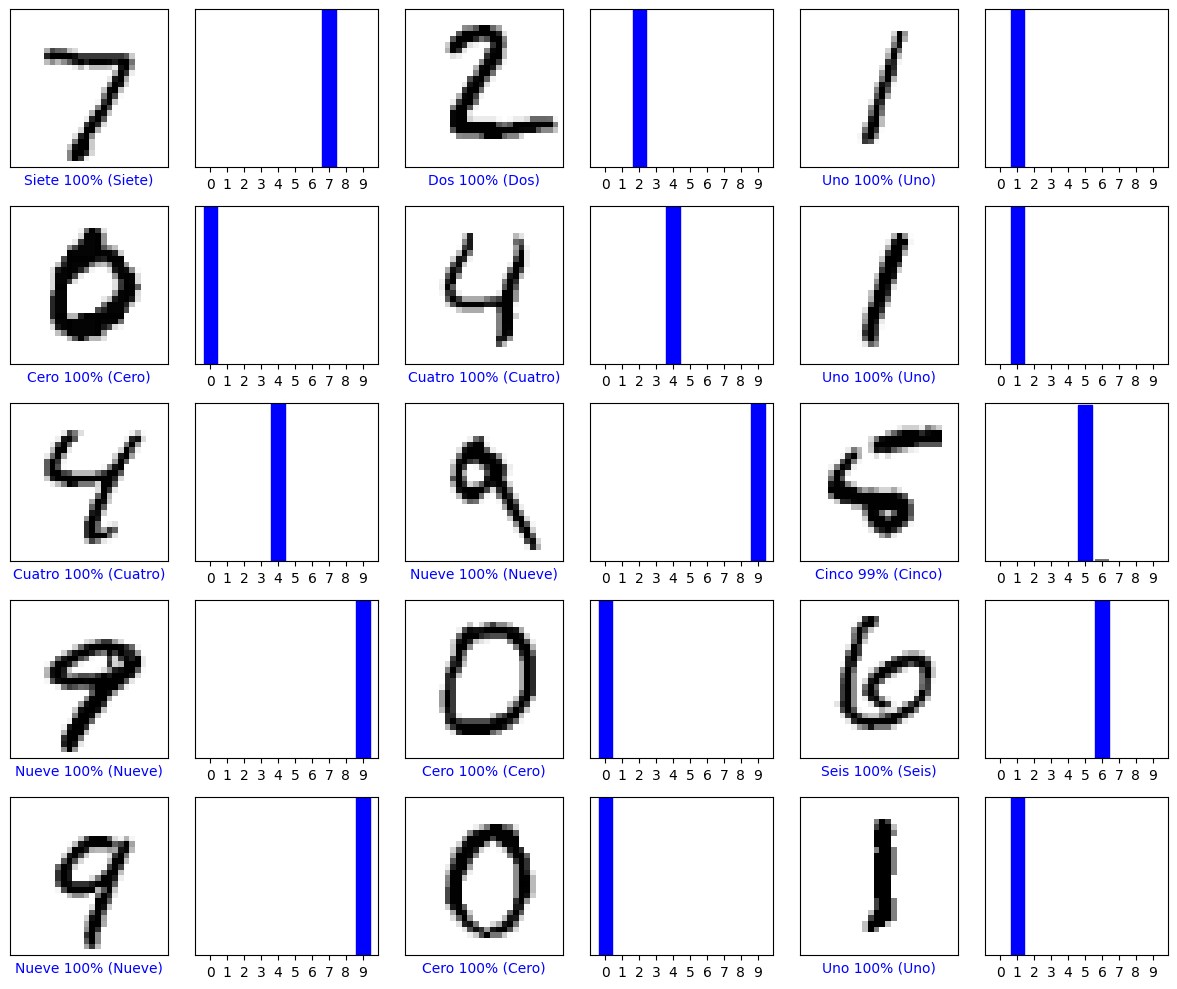

In [34]:
# Gráfica de varias imagenes con sus posibles predicciones.
# Las predicciones correctas están marcadas en azul y las incorrectas en rojo.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [41]:
# Hacemos una predicción sobre una única imagen, en este caso la número 456.
img = test_images[456]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [47]:
#Predecimos la etiqueta correcta correspondiente a esta imagen.
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[6.5313213e-07 5.0180507e-01 4.9431372e-01 2.4475576e-03 7.4861889e-13
  1.2812440e-04 4.6651834e-09 1.2644067e-03 4.0497434e-05 2.9358604e-08]]


In [50]:
#El modelo nos predice una etiqueta del número uno.
np.argmax(predictions_single[0])

1